In [33]:
# import sys
# import os

# # Set path of this file as parent folder path 
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# # Custom Libraries 
# from custom_libraries import MinMaxScalerCustom

In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import joblib 

## Data exploration of train data

In [35]:
csv_filename = "../data/train_deribit_data.csv"
df = pd.read_csv(csv_filename)

In [36]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display column names
print("\nColumn Names:")
print(df.columns)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Display basic statistics
print("\nBasic Statistical Summary:")
print(df.describe())

# Check data types of each column
print("\nColumn Data Types:")
print(df.dtypes)

First 5 rows of the dataset:
       Timestamp     Open     High      Low    Close    Volume
0  1704699960000  43900.0  43904.5  43899.0  43899.0  1.340290
1  1704700020000  43899.0  43899.0  43899.0  43899.0  0.000000
2  1704700080000  43882.5  43890.0  43882.5  43887.0  1.842701
3  1704700140000  43910.0  43910.5  43906.5  43906.5  0.045549
4  1704700200000  43909.0  43909.0  43909.0  43909.0  1.154661

Column Names:
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Missing Values:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Number of Duplicate Rows: 0

Basic Statistical Summary:
          Timestamp          Open          High           Low         Close  \
count  8.000000e+03   8000.000000   8000.000000   8000.000000   8000.000000   
mean   1.704940e+12  45460.046938  45474.469312  45445.159312  45460.997000   
std    1.385727e+08   1483.301782   1485.899827   1481.010813   1483.287659   
min   

In [37]:
# Convert timestamp from milliseconds to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

# Save cleaned data
df.to_csv("../data/train_cleaned_data.csv", index=False)

# Display the first few rows
print(df.head())

            Timestamp     Open     High      Low    Close    Volume
0 2024-01-08 07:46:00  43900.0  43904.5  43899.0  43899.0  1.340290
1 2024-01-08 07:47:00  43899.0  43899.0  43899.0  43899.0  0.000000
2 2024-01-08 07:48:00  43882.5  43890.0  43882.5  43887.0  1.842701
3 2024-01-08 07:49:00  43910.0  43910.5  43906.5  43906.5  0.045549
4 2024-01-08 07:50:00  43909.0  43909.0  43909.0  43909.0  1.154661


In [38]:

# Load training data
train_df = pd.read_csv("../data/train_cleaned_data.csv")

# Set Timestamp as index 
train_df.set_index("Timestamp", inplace=True)

# sort using Date time index 
train_df.sort_index(inplace=True)

# Display the first few rows
print(train_df.head())

                        Open     High      Low    Close    Volume
Timestamp                                                        
2024-01-08 07:46:00  43900.0  43904.5  43899.0  43899.0  1.340290
2024-01-08 07:47:00  43899.0  43899.0  43899.0  43899.0  0.000000
2024-01-08 07:48:00  43882.5  43890.0  43882.5  43887.0  1.842701
2024-01-08 07:49:00  43910.0  43910.5  43906.5  43906.5  0.045549
2024-01-08 07:50:00  43909.0  43909.0  43909.0  43909.0  1.154661


In [39]:
# Select features (independent variables) and target (dependent variable)
features = ["Open", "High", "Low", "Close", "Volume"]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])

# Convert to NumPy array
X = train_df[features].values
Y = train_df["Close"].values
Y = Y.reshape(-1,1)

print("Train data prepared successfully!")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Train data prepared successfully!
X shape: (8000, 5)
Y shape: (8000, 1)


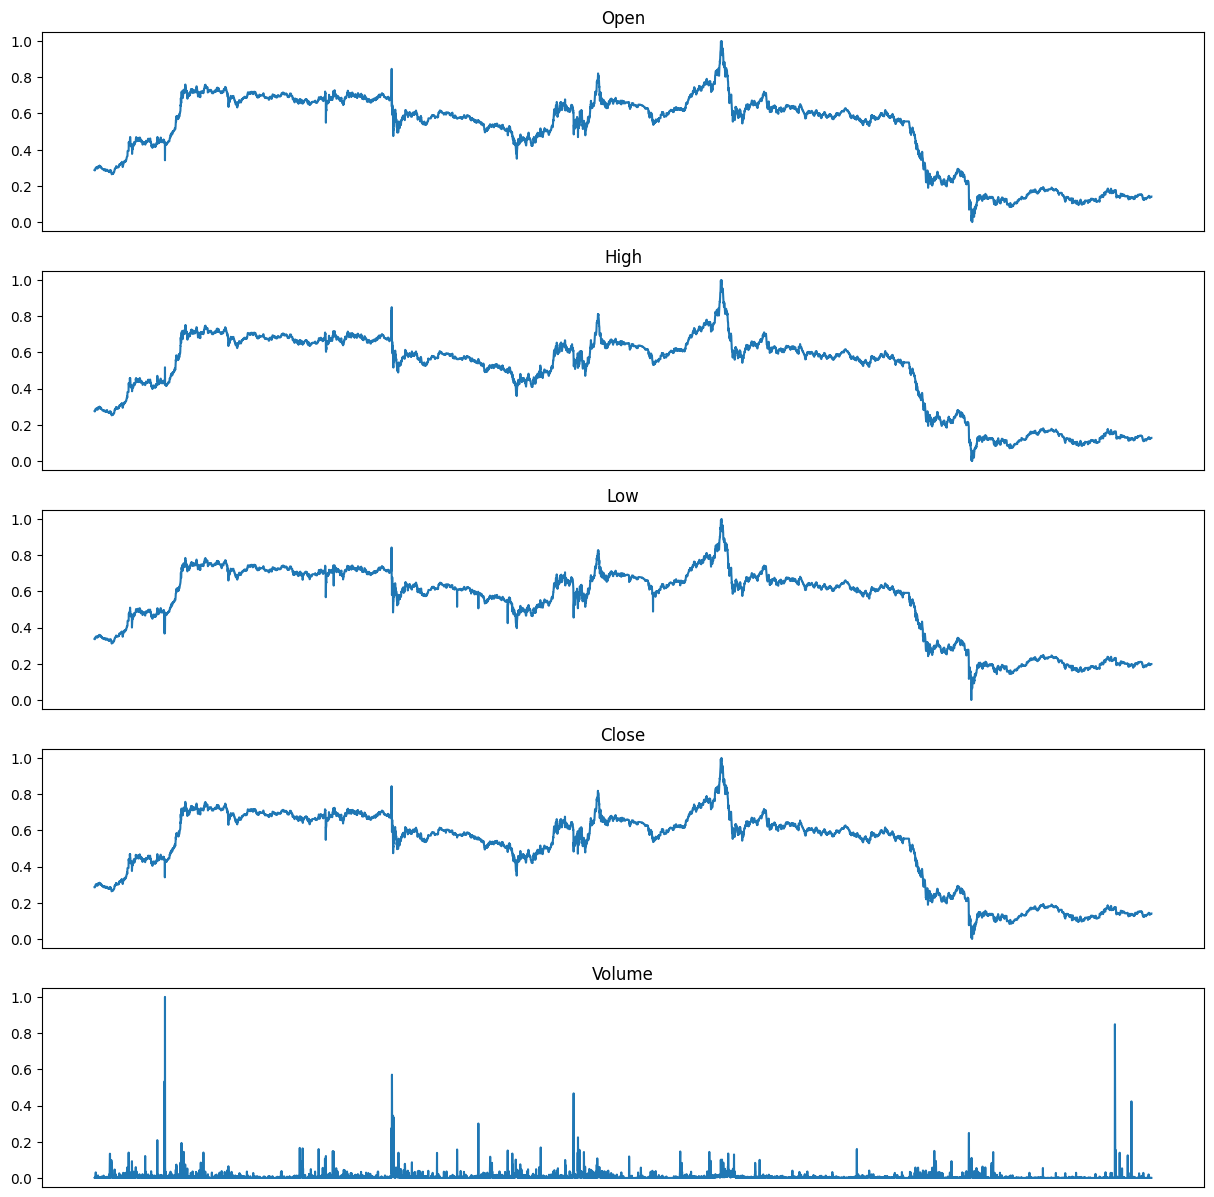

In [40]:
df_scaled = pd.DataFrame(train_df[features], columns = train_df.columns, index = train_df.index)

plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(5)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)


In [41]:
# Save processed data
np.save("../data/X.npy", X)
np.save("../data/Y.npy", Y)

# Save the fitted scaler, important for inverse transformation later
joblib.dump(scaler, "../models/scaler.pkl")

print("Processed training data and scaler saved successfully!")

Processed training data and scaler saved successfully!


## Data exploration of test data

In [42]:
test_csv_filename = "../data/test_deribit_data.csv"
test_df = pd.read_csv(test_csv_filename)

In [43]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(test_df.head())

# Display column names
print("\nColumn Names:")
print(test_df.columns)

# Check for missing values
print("\nMissing Values:")
print(test_df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", test_df.duplicated().sum())

# Display basic statistics
print("\nBasic Statistical Summary:")
print(test_df.describe())

# Check data types of each column
print("\nColumn Data Types:")
print(test_df.dtypes)

First 5 rows of the dataset:
       Timestamp     Open     High      Low    Close  Volume
0  1705179960000  42854.5  42854.5  42854.5  42854.5     0.0
1  1705180020000  42854.5  42854.5  42854.5  42854.5     0.0
2  1705180080000  42854.5  42854.5  42854.5  42854.5     0.0
3  1705180140000  42854.5  42854.5  42854.5  42854.5     0.0
4  1705180200000  42854.5  42854.5  42854.5  42854.5     0.0

Column Names:
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Missing Values:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Number of Duplicate Rows: 0

Basic Statistical Summary:
          Timestamp          Open          High           Low         Close  \
count  2.001000e+03   2001.000000   2001.000000   2001.000000   2001.000000   
mean   1.705240e+12  42701.235132  42705.197901  42696.140930  42701.446277   
std    3.466700e+07    262.169883    259.604901    266.673332    262.111181   
min    1.705180e+1

In [44]:
# Convert timestamp from milliseconds to datetime
test_df["Timestamp"] = pd.to_datetime(test_df["Timestamp"], unit="ms")

# Save cleaned data
test_df.to_csv("../data/test_cleaned_data.csv", index=False)

# Display the first few rows
print(test_df.head())

            Timestamp     Open     High      Low    Close  Volume
0 2024-01-13 21:06:00  42854.5  42854.5  42854.5  42854.5     0.0
1 2024-01-13 21:07:00  42854.5  42854.5  42854.5  42854.5     0.0
2 2024-01-13 21:08:00  42854.5  42854.5  42854.5  42854.5     0.0
3 2024-01-13 21:09:00  42854.5  42854.5  42854.5  42854.5     0.0
4 2024-01-13 21:10:00  42854.5  42854.5  42854.5  42854.5     0.0


In [45]:

# Load training data
test_df = pd.read_csv("../data/test_cleaned_data.csv")

# Set Timestamp as index 
test_df.set_index("Timestamp", inplace=True)

# sort using Date time index 
test_df.sort_index(inplace=True)

# Display the first few rows
print(test_df.head())

                        Open     High      Low    Close  Volume
Timestamp                                                      
2024-01-13 21:06:00  42854.5  42854.5  42854.5  42854.5     0.0
2024-01-13 21:07:00  42854.5  42854.5  42854.5  42854.5     0.0
2024-01-13 21:08:00  42854.5  42854.5  42854.5  42854.5     0.0
2024-01-13 21:09:00  42854.5  42854.5  42854.5  42854.5     0.0
2024-01-13 21:10:00  42854.5  42854.5  42854.5  42854.5     0.0


In [46]:
# Load the saved scaler (to normalize test data)
scaler = joblib.load("../models/scaler.pkl")
test_df[features] = scaler.fit_transform(test_df[features])

# Convert to NumPy array
X_test = test_df[features].values
Y_test = test_df["Close"].values
Y_test = Y_test.reshape(-1,1)

print("Test data prepared successfully!")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Test data prepared successfully!
X_test shape: (2001, 5)
Y_test shape: (2001, 1)


In [47]:

# Save processed data
np.save("../data/X_test.npy", X_test)
np.save("../data/Y_test.npy", Y_test)

print("Processed testing data and scaler saved successfully!")

Processed testing data and scaler saved successfully!
